In [36]:
#This uses code from https://github.com/dms-vep/dms-vep-pipeline, please refer to this repository for more detailed information.

import sys

import Bio.SeqIO

import alignparse.utils

import dms_variants.codonvarianttable

import pandas as pd
pd.set_option('display.max_rows',10)

import seaborn as sns

import scipy as sp
import numpy as np

import matplotlib.pyplot as plt

In [37]:
background='SYD21'
geneseq='ATGAAGGCAATACTAGTAGTTATGCTGTATACATTTACAACCGCAAATGCAGACACATTATGTATAGGTTATCATGCGAACAATTCAACAGACACTGTGGACACAGTACTAGAAAAGAATGTAACAGTAACACACTCTGTCAATCTTCTAGAAGACAAGCATAACGGAAAACTATGCAAACTAAGAGGGGTAGCCCCATTGCATTTGGGTCAATGTAACATTGCTGGCTGGATCCTGGGAAATCCAGAGTGTGAATCACTCTCCACAGCAAGATCATGGTCCTACATTGTGGAAACATCTAATTCAGACAATGGAACGTGTTACCCAGGAAATTTCATCAATTATGAGGAGCTAAGAGAGCAATTGAGCTCAGTGTCATCATTTGAAAGGTTTGAAATATTCCCCAAGACAAGTTCATGGCCTAATCATGACTCGGACAATGGTGTAACGGCAGCATGTCCTCACGCTGGAGCAAAAAGCTTCTACAAAAACTTGATATGGCTGGTTAAAAAAGGAAAATCATACCCAAAGATCAACCAAACCTACATTAATGATAAAGGGAAAGAAGTCCTCGTGCTGTGGGGCATTCACCATCCACCTACTATTACTGACCAAGAAAGTCTCTATCAGAATGCAGATGCATATGTTTTTGTGGGGACATCAAGATACAGCAAGAAGTTCAAGCCGGAAATAGCAGCAAGACCCAAAGTGAGGGATCAAGCAGGGAGAATGAACTATTACTGGACACTAGTAGAACCGGGAGATAAAATAACATTCGAAGCAACTGGTAATCTAGTGGCACCGAGATATGCATTCACAATGGAAAAAGATGCTGGATCTGGTATTATCATTTCAGATACACCAGTCCACGATTGCAATACAACTTGTCAGACACCCGAGGGTGCTATAAACACCAGCCTCCCATTTCAGAATGTACATCCGATCACGATTGGGAAATGTCCAAAGTATGTAAGAAGCACAAAATTGAGACTGGCCACAGGATTGAGGAATGTCCCGTCTATTCAATCTAGAGGCCTATTCGGGGCCATTGCTGGCTTCATCGAAGGGGGGTGGACAGGGATGGTAGATGGATGGTACGGTTATCACCATCAAAATGAGCAGGGGTCAGGATATGCAGCCGATCTGAAGAGCACACAAAATGCCATTGATAAGATTACCAACAAAGTAAATTCTGTCATTGAAAAGATGAATACACAGTTCACAGCAGTTGGTAAAGAGTTCAACCACCTTGAAAAAAGAATAGAGAATCTAAATAAAAAGGTTGATGATGGTTTCCTGGACATTTGGACTTACAATGCCGAACTGTTGGTTCTACTGGAAAACGAAAGAACTTTGGACTATCACGATTCAAATGTGAAGAACTTGTATGAAAAAGTAAGAAACCAGTTAAAAAACAATGCCAAGGAAATTGGAAACGGCTGCTTTGAATTTTACCACAAATGCGACAACACATGCATGGAAAGTGTCAAGAATGGGACTTATGACTACCCAAAATACTCAGAGGAAGCAAAATTAAACAGAGAAAAAATAGATGGAGTAAAGCTGGACTCAACAAGGATTTACCAGATTTTGGCAATCTATTCAACTGTTGCCAGTTCATTGGTCCTGGTCGTGTCACTGGGAGCCATCAGCTTCTGGATGTGCAGCAACGGCAGCCTCCAGTGTAGGATTTGCATTTAA'

In [38]:
variants = dms_variants.codonvarianttable.CodonVariantTable(
    barcode_variant_file=f'data/codon_variant_tables/codon_variant_table_{background}.csv',
    geneseq=geneseq,
    allowgaps=True,
    substitutions_are_codon=True,
    primary_target=background,
    substitutions_col="codon_substitutions",
)

In [39]:
variants_df=variants.barcode_variant_df
variants_df

,target,library,barcode,variant_call_support,codon_substitutions,aa_substitutions,n_codon_substitutions,n_aa_substitutions
0,SYD21,rep1,AACTACGAGTTCAGCTGTCGTGCGCACC,1,AAA276CTT,K276L,1,1
1,SYD21,rep1,AACTGGGACTACAGCTACATCTCACTTC,1,AAG226TCA,K226S,1,1
2,SYD21,rep1,AGCTCCTCATGAAGCTTGTAGGAACGGG,5,AAT101TAA,N101*,1,1
3,SYD21,rep1,ATATAAAGGGTAAGCTCTAGTCACTTTA,2,CCT200GCA,P200A,1,1
4,SYD21,rep1,ATATAAAGGGTAAGCTTAAGATATCCTC,3,CCT200GCA,P200A,1,1
...,...,...,...,...,...,...,...,...
407607,SYD21,rep2,TTGCGGTCCATTAGCTGCGATCGCCCCC,1,AGG130CAT,R130H,1,1
407608,SYD21,rep2,TTGCGTACATCCAGCTCGGATGGTGCCT,2,AAT142GGA,N142G,1,1
407609,SYD21,rep2,TTGCTAAGTACCAGCTCTACCAAAATGC,1,GGA110AAT,G110N,1,1
407610,SYD21,rep2,TTGCTCACGCTCAGCTAGATATACAATC,5,GGA80TGC,G80C,1,1


In [40]:
replicate_list=['rep1','rep2']
variant_counts=pd.DataFrame()
for rep in replicate_list:
    replicate = rep[-1:]
    variant_counts = pd.concat(
        [   variant_counts,
            pd.read_csv(f'data/counts_files/{background}_R{replicate}_Plasmid.csv', na_filter=False).assign(
                library=f'{rep}',
                sample='Plasmid',
            ),
            pd.read_csv(f'data/counts_files/{background}_R{replicate}_P1.csv', na_filter=False).assign(
                library=f'{rep}',
                sample='P1',
            ),
        ]
    )
assert variant_counts.notnull().all().all()

In [41]:
variant_counts

,Unnamed: 0,barcode,count,codon_substitutions,aa_substitutions,variant_call_support,library,sample
0,0,AACTACGAGTTCAGCTGTCGTGCGCACC,138,AAA276CTT,K276L,1,rep1,Plasmid
1,1,AACTGGGACTACAGCTACATCTCACTTC,180,AAG226TCA,K226S,1,rep1,Plasmid
2,2,AGCTCCTCATGAAGCTTGTAGGAACGGG,175,AAT101TAA,N101*,5,rep1,Plasmid
3,3,ATATAAAGGGTAAGCTCTAGTCACTTTA,62,CCT200GCA,P200A,2,rep1,Plasmid
4,4,ATATACAGACATAGCTAGTCTCGCATTT,67,TGG167TCA,W167S,2,rep1,Plasmid
...,...,...,...,...,...,...,...,...
19205,19205,ATCTTTTACGTCAGCTTTCTAATAAATC,4,CAA180TGG,Q180W,3,rep2,P1
19206,19206,ATCTTTTGGACAAGCTAAATTTTCGATC,54,TTC227AGA,F227R,2,rep2,P1
19207,19207,ATCTTTTGGACAAGCTCATACATAGGTC,7,TTC227TAT,F227Y,1,rep2,P1
19208,19208,ATCTTTTGGACAAGCTCTGAGACAAACG,1,TTC227TCA,F227S,1,rep2,P1


In [42]:
min_wt_count=1000
min_wt_frac=0.001

wt_fracs = (
    variant_counts.assign(
        wt_aa_sequence=lambda x: (x["aa_substitutions"] == "").map(
            {True: "wt", False: "not_wt"}
        )
    )
    .groupby(["library", "sample", "wt_aa_sequence"], as_index=False)
    .aggregate({"count": "sum"})
    .pivot_table(index=["library", "sample"], values="count", columns="wt_aa_sequence")
    .assign(frac_wt=lambda x: x["wt"] / x["not_wt"])
    .assign(
        adequate_wt_counts=lambda x: x["wt"] >= min_wt_count,
        adequate_wt_frac=lambda x: x["frac_wt"] >= min_wt_frac,
        adequate_wt=lambda x: x["adequate_wt_counts"] | x["adequate_wt_frac"],
    )
)
if not wt_fracs["adequate_wt"].all():
    raise ValueError(f"Inadequate wildtype counts or fraction:\n{str(wt_fracs)}")

variants.add_sample_counts_df(variant_counts)

In [43]:
func_scores = variants.func_scores(
    preselection='Plasmid',
    pseudocount=0.5,
    libraries='all',
    by='aa_substitutions',
    syn_as_wt=False
)

In [44]:
renumber = alignparse.utils.MutationRenumber(
    number_mapping=pd.read_csv(f'data/renumbering_files/{background}_renumber.csv'),
    old_num_col="sequential_site",
    new_num_col="reference_site",
    wt_nt_col=None,
    allow_letter_suffixed_numbers=True,
)

In [45]:
func_scores = (
    func_scores.query(f"target == '{background}'")
    .drop(columns=["target"])
    .rename(columns={"aa_substitutions": "aa_substitutions_sequential"})
    .assign(
        aa_substitutions_reference=lambda x: (
            x["aa_substitutions_sequential"].apply(
                renumber.renumber_muts,
                allow_gaps=True,
                allow_stop=True,
            )
        ),
    )
)

In [46]:
func_scores.query("library == 'rep1' ").to_csv(f'data/func_scores/{background}_R1.csv')
func_scores.query("library == 'rep2' ").to_csv(f'data/func_scores/{background}_R2.csv')
func_scores.query("library == 'all libraries' ").to_csv(f'data/func_scores/{background}_all.csv')

In [47]:
df=func_scores.pivot_table(columns='library',index='aa_substitutions_reference',values='func_score').dropna().reset_index()
df

library,aa_substitutions_reference,rep1,rep2,all libraries
0,,1.052767,0.354514,0.576567
1,A137-,-5.173948,-7.048632,-6.342281
2,A137C,0.871317,0.621926,0.749410
3,A137D,2.624312,2.230988,2.488968
4,A137E,-0.857714,-0.500398,-0.344095
...,...,...,...,...
3356,Y95M,-1.548316,-2.826111,-2.351231
3357,Y95N,-8.225394,-2.608236,-3.033799
3358,Y95Q,-7.585750,-11.412249,-9.395400
3359,Y95R,-7.795594,-9.637189,-8.958346


0.5175521090611649 1.023672069932099e-229 3361


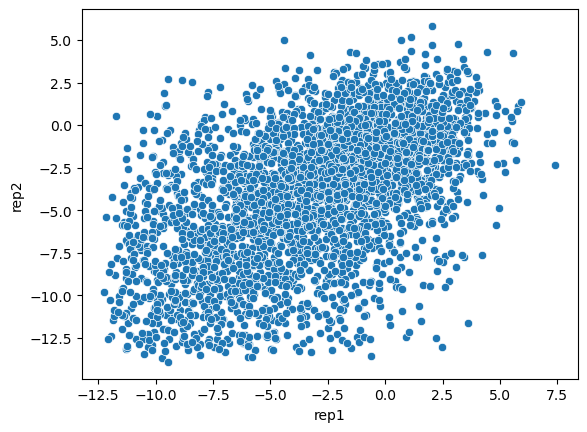

In [48]:
sns.scatterplot(df,x='rep1',y='rep2')
r, p = sp.stats.pearsonr(x=df['rep1'], y=df['rep2'])
print(r,p,len(df))